Vamos aplicar PCA na base de dados que obtemos sobre estabelecimentos. 

# Coleta e preparação dos dados

In [1]:
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly.io as pio
pio.renderers.default = 'browser'
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import shapefile as shp
import matplotlib.pyplot as plt
import scipy as sp

In [2]:
# Configurações para evitar truncamento
pd.set_option('display.max_columns', None)  # Mostra todas as colunas
pd.set_option('display.max_rows', None)     # Mostra todas as linhas
pd.set_option('display.max_colwidth', None) # Mostra o conteúdo completo das células



Carregando os dados o banco de dados

In [3]:
df_google_places_mcdonalds = pd.read_csv('base/base_google_places_tratada_normalizada_mcdonalds.csv', sep=';', encoding='utf-8')
df_google_places_burgerking = pd.read_csv('base/base_google_places_tratada_normalizada_burgerking.csv', sep=';', encoding='utf-8')
df_google_places_bobs = pd.read_csv('base/base_google_places_tratada_normalizada_bobs.csv', sep=';', encoding='utf-8')
# Exibindo informações iniciais
# print("\nInformações do dataset:")
# print(df_google_places_mcdonalds.info())
# print(df_google_places_burgerking.info())

In [4]:
df_saopaulo = pd.read_csv('base/dados_distrito_sp_2015.csv', sep=';', encoding='utf-8')
# Exibindo informações iniciais
print("\nInformações do dataset:")
print(df_saopaulo.info())


Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   cód_ibge      96 non-null     int64 
 1   distrito      96 non-null     object
 2   renda         96 non-null     int64 
 3   quota         96 non-null     object
 4   escolaridade  96 non-null     object
 5   idade         96 non-null     int64 
 6   mortalidade   96 non-null     object
 7   txcresc       96 non-null     object
 8   causasext     96 non-null     object
 9   favel         96 non-null     object
 10  denspop       96 non-null     object
dtypes: int64(3), object(8)
memory usage: 8.4+ KB
None


In [5]:
# Converter os nomes dos distritos para letras minúsculas e remover espaços extras
df_google_places_mcdonalds["distrito_old"] = df_google_places_mcdonalds["distrito"]
df_google_places_mcdonalds["distrito"] = df_google_places_mcdonalds["distrito_atualizado"].str.lower().str.strip()
df_saopaulo["distrito"] = df_saopaulo["distrito"].str.lower().str.strip()

# Realizar a junção das tabelas com base nos distritos
df_merged_mcdonalds = df_google_places_mcdonalds.merge(df_saopaulo, on="distrito", how="inner")

# Salvar a base unificada para um novo CSV
df_merged_mcdonalds.to_csv("dados_unificados_google_mcdonalds_socioec.csv", index=False, sep=";", encoding="utf-8")

print(df_merged_mcdonalds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   place_id                        174 non-null    object 
 1   name                            174 non-null    object 
 2   address                         174 non-null    object 
 3   distrito                        174 non-null    object 
 4   latitude                        174 non-null    int64  
 5   longitude                       174 non-null    object 
 6   phone                           150 non-null    object 
 7   website                         169 non-null    object 
 8   rating                          172 non-null    float64
 9   total_ratings                   172 non-null    float64
 10  price_level                     169 non-null    float64
 11  business_status                 174 non-null    object 
 12  is_open_now                     154 

In [55]:
# Converter os nomes dos distritos para letras minúsculas e remover espaços extras
df_google_places_burgerking["distrito_old"]= df_google_places_burgerking["distrito"]
df_google_places_burgerking["distrito"] = df_google_places_burgerking["distrito_atualizado"].str.lower().str.strip()
df_saopaulo["distrito"] = df_saopaulo["distrito"].str.lower().str.strip()

# Realizar a junção das tabelas com base nos distritos
df_merged_burgerking = df_google_places_burgerking.merge(df_saopaulo, on="distrito", how="inner")

# Salvar a base unificada para um novo CSV
df_merged_burgerking.to_csv("dados_unificados_google_burguerking_socioec.csv", index=False, sep=";", encoding="utf-8")

print(df_merged_burgerking.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   place_id                        116 non-null    object 
 1   name                            116 non-null    object 
 2   address                         116 non-null    object 
 3   distrito                        116 non-null    object 
 4   latitude                        116 non-null    int64  
 5   longitude                       116 non-null    object 
 6   phone                           7 non-null      object 
 7   website                         107 non-null    object 
 8   rating                          112 non-null    float64
 9   total_ratings                   112 non-null    float64
 10  price_level                     102 non-null    float64
 11  business_status                 116 non-null    object 
 12  is_open_now                     96 n

In [7]:
# Converter os nomes dos distritos para letras minúsculas e remover espaços extras
df_google_places_bobs["distrito_old"]= df_google_places_bobs["distrito"]
df_google_places_bobs["distrito"] = df_google_places_bobs["distrito_atualizado"].str.lower().str.strip()
df_saopaulo["distrito"] = df_saopaulo["distrito"].str.lower().str.strip()

# Realizar a junção das tabelas com base nos distritos
df_merged_bobs = df_google_places_bobs.merge(df_saopaulo, on="distrito", how="inner")

# Salvar a base unificada para um novo CSV
df_merged_bobs.to_csv("dados_unificados_google_burguerking_socioec.csv", index=False, sep=";", encoding="utf-8")

print(df_merged_bobs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   place_id                        43 non-null     object 
 1   name                            43 non-null     object 
 2   address                         43 non-null     object 
 3   distrito                        43 non-null     object 
 4   latitude                        43 non-null     int64  
 5   longitude                       43 non-null     object 
 6   phone                           21 non-null     object 
 7   website                         40 non-null     object 
 8   rating                          36 non-null     float64
 9   total_ratings                   36 non-null     float64
 10  price_level                     25 non-null     float64
 11  business_status                 43 non-null     object 
 12  is_open_now                     16 non

In [8]:
df_not_desc_mcdonalds = df_merged_mcdonalds.drop(columns=['place_id','name','address','distrito','latitude','longitude','phone', 'website',
        'price_level','business_status','is_open_now','types', 'opening_hours','delivery','dine_in', 
        'takeout','serves_breakfast','serves_dinner','serves_lunch','wheelchair_accessible_entrance',
        'distrito_atualizado','confianca_distrito','metodo_distrito','distrito_old','cód_ibge'
        ])
df_not_desc_burgerking = df_merged_burgerking.drop(columns=['place_id','name','address','distrito','latitude','longitude','phone', 'website',
        'price_level','business_status','is_open_now','types', 'opening_hours','delivery','dine_in', 
        'takeout','serves_breakfast','serves_dinner','serves_lunch','wheelchair_accessible_entrance',
        'distrito_atualizado','confianca_distrito','metodo_distrito','distrito_old','cód_ibge'
        ])

df_not_desc_bobs = df_merged_bobs.drop(columns=['place_id','name','address','distrito','latitude','longitude','phone', 'website',
        'price_level','business_status','is_open_now','types', 'opening_hours','delivery','dine_in', 
        'takeout','serves_breakfast','serves_dinner','serves_lunch','wheelchair_accessible_entrance',
        'distrito_atualizado','confianca_distrito','metodo_distrito','distrito_old','cód_ibge'
        ])
# print(df_not_desc.head())
print(df_not_desc_mcdonalds.info(verbose=True))
print(df_not_desc_burgerking.info(verbose=True))
print(df_not_desc_bobs.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rating         172 non-null    float64
 1   total_ratings  172 non-null    float64
 2   photos_count   174 non-null    int64  
 3   reviews_count  174 non-null    int64  
 4   renda          174 non-null    int64  
 5   quota          174 non-null    object 
 6   escolaridade   174 non-null    object 
 7   idade          174 non-null    int64  
 8   mortalidade    174 non-null    object 
 9   txcresc        174 non-null    object 
 10  causasext      174 non-null    object 
 11  favel          174 non-null    object 
 12  denspop        174 non-null    object 
dtypes: float64(2), int64(4), object(7)
memory usage: 17.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------       

In [9]:

df_not_desc_mcdonalds = df_merged_mcdonalds.drop(columns=['place_id','name','address','distrito','latitude','longitude','phone', 'website',
        'price_level','business_status','is_open_now','types', 'opening_hours','delivery','dine_in', 
        'takeout','serves_breakfast','serves_dinner','serves_lunch','wheelchair_accessible_entrance',
        'distrito_atualizado','confianca_distrito','metodo_distrito','distrito_old','cód_ibge'
        ])
df_not_desc_burgerking = df_merged_burgerking.drop(columns=['place_id','name','address','distrito','latitude','longitude','phone', 'website',
        'price_level','business_status','is_open_now','types', 'opening_hours','delivery','dine_in', 
        'takeout','serves_breakfast','serves_dinner','serves_lunch','wheelchair_accessible_entrance',
        'distrito_atualizado','confianca_distrito','metodo_distrito','distrito_old','cód_ibge'
        ])

df_not_desc_bobs = df_merged_bobs.drop(columns=['place_id','name','address','distrito','latitude','longitude','phone', 'website',
        'price_level','business_status','is_open_now','types', 'opening_hours','delivery','dine_in', 
        'takeout','serves_breakfast','serves_dinner','serves_lunch','wheelchair_accessible_entrance',
        'distrito_atualizado','confianca_distrito','metodo_distrito','distrito_old','cód_ibge'
        ])
# print(df_not_desc.head())
print(df_not_desc_mcdonalds.info(verbose=True))
print(df_not_desc_burgerking.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rating         172 non-null    float64
 1   total_ratings  172 non-null    float64
 2   photos_count   174 non-null    int64  
 3   reviews_count  174 non-null    int64  
 4   renda          174 non-null    int64  
 5   quota          174 non-null    object 
 6   escolaridade   174 non-null    object 
 7   idade          174 non-null    int64  
 8   mortalidade    174 non-null    object 
 9   txcresc        174 non-null    object 
 10  causasext      174 non-null    object 
 11  favel          174 non-null    object 
 12  denspop        174 non-null    object 
dtypes: float64(2), int64(4), object(7)
memory usage: 17.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------       

In [10]:
# Converter colunas específicas de object para float
cols_to_convert = ["quota", "escolaridade", "mortalidade", "txcresc", "causasext", "favel", "denspop"]

# Substituir possíveis vírgulas por pontos (separador decimal)
df_not_desc_mcdonalds[cols_to_convert] = df_not_desc_mcdonalds[cols_to_convert].replace(",", ".", regex=True)
df_not_desc_burgerking[cols_to_convert] = df_not_desc_burgerking [cols_to_convert].replace(",", ".", regex=True)
df_not_desc_bobs[cols_to_convert] = df_not_desc_bobs[cols_to_convert].replace(",", ".", regex=True)

# Converter para float
df_not_desc_mcdonalds[cols_to_convert] = df_not_desc_mcdonalds[cols_to_convert].astype(float)
df_not_desc_burgerking[cols_to_convert] = df_not_desc_burgerking[cols_to_convert].astype(float)
df_not_desc_bobs[cols_to_convert] = df_not_desc_bobs[cols_to_convert].astype(float)

# Arredondar para duas casas decimais
df_not_desc_mcdonalds[cols_to_convert] = df_not_desc_mcdonalds[cols_to_convert].round(2)
df_not_desc_burgerking[cols_to_convert] = df_not_desc_burgerking[cols_to_convert].round(2)
df_not_desc_bobs[cols_to_convert] = df_not_desc_bobs[cols_to_convert].round(2)

df_not_desc_mcdonalds = df_not_desc_mcdonalds.dropna()
df_not_desc_burgerking = df_not_desc_burgerking.dropna()
df_not_desc_bobs = df_not_desc_bobs.dropna()

In [11]:
print(df_not_desc_mcdonalds.info())

<class 'pandas.core.frame.DataFrame'>
Index: 172 entries, 0 to 173
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rating         172 non-null    float64
 1   total_ratings  172 non-null    float64
 2   photos_count   172 non-null    int64  
 3   reviews_count  172 non-null    int64  
 4   renda          172 non-null    int64  
 5   quota          172 non-null    float64
 6   escolaridade   172 non-null    float64
 7   idade          172 non-null    int64  
 8   mortalidade    172 non-null    float64
 9   txcresc        172 non-null    float64
 10  causasext      172 non-null    float64
 11  favel          172 non-null    float64
 12  denspop        172 non-null    float64
dtypes: float64(9), int64(4)
memory usage: 18.8 KB
None


In [12]:
print(df_not_desc_mcdonalds.info(verbose=True))
print(df_not_desc_burgerking.info(verbose=True))
print(df_not_desc_bobs.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
Index: 172 entries, 0 to 173
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rating         172 non-null    float64
 1   total_ratings  172 non-null    float64
 2   photos_count   172 non-null    int64  
 3   reviews_count  172 non-null    int64  
 4   renda          172 non-null    int64  
 5   quota          172 non-null    float64
 6   escolaridade   172 non-null    float64
 7   idade          172 non-null    int64  
 8   mortalidade    172 non-null    float64
 9   txcresc        172 non-null    float64
 10  causasext      172 non-null    float64
 11  favel          172 non-null    float64
 12  denspop        172 non-null    float64
dtypes: float64(9), int64(4)
memory usage: 18.8 KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 112 entries, 0 to 115
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  ----

In [13]:
print(df_not_desc_burgerking.describe())
print(df_not_desc_burgerking.head(10))
print(df_not_desc_burgerking.isna().sum())

           rating  total_ratings  photos_count  reviews_count        renda  \
count  112.000000     112.000000    112.000000     112.000000   112.000000   
mean     3.675893    2329.321429      9.214286       4.892857  2291.687500   
std      0.611488    3125.303982      2.551906       0.590574  1038.556014   
min      1.000000       1.000000      0.000000       1.000000   820.000000   
25%      3.500000     199.750000     10.000000       5.000000  1405.500000   
50%      3.900000    1150.000000     10.000000       5.000000  2013.000000   
75%      4.000000    3252.500000     10.000000       5.000000  2776.750000   
max      5.000000   17742.000000     10.000000       5.000000  5146.000000   

            quota  escolaridade       idade  mortalidade     txcresc  \
count  112.000000    112.000000  112.000000   112.000000  112.000000   
mean    42.213571      7.577679   29.571429    14.980000   -1.564196   
std     25.297851      0.886202    3.798327     4.290556    2.007296   
min      

In [14]:
# Salvar a base unificada para um novo CSV
df_not_desc_mcdonalds.to_csv("dados_unificados_google_mcdonalds_socioec_var_metricas.csv", index=False, sep=";", encoding="utf-8")
df_not_desc_burgerking.to_csv("dados_unificados_google_burgerking_socioec_var_metricas.csv", index=False, sep=";", encoding="utf-8")
df_not_desc_bobs.to_csv("dados_unificados_google_bobs_socioec_var_metricas.csv", index=False, sep=";", encoding="utf-8")

# Análise exploratória

Temos 13 variáveis original, por tanto, podemos gerar 13 fatores

In [15]:
print(len(df_not_desc_mcdonalds.columns))

13


#### Mapa de calor da Matriz de correlação de Pearson entre váriaveis MacDonal's

In [16]:
correl_mc = df_not_desc_mcdonalds.corr()

# Gráfico interativo

fig = go.Figure()

fig.add_trace(
    go.Heatmap(
        x = correl_mc.columns,
        y = correl_mc.index,
        z = np.array(correl_mc),
        text=correl_mc.values,
        texttemplate='%{text:.4f}',
        colorscale='viridis'))

fig.update_layout(
    title="Mapa de Calor da Matriz de Correlação - McDonald's",
    height = 700,
    width = 700,
    yaxis=dict(autorange="reversed"))

fig.show()

#### Mapa de calor da Matriz de Pearson entre váriaveis Burger King

In [17]:
correl_bk = df_not_desc_burgerking.corr()

# Gráfico interativo

fig = go.Figure()

fig.add_trace(
    go.Heatmap(
        x = correl_bk.columns,
        y = correl_bk.index,
        z = np.array(correl_bk),
        text=correl_bk.values,
        texttemplate='%{text:.4f}',
        colorscale='viridis'))

fig.update_layout(
    title="Mapa de Calor da Matriz de Correlação - Burger King",
    height = 700,
    width = 700,
    yaxis=dict(autorange="reversed"))

fig.show()

#### Mapa de calor da Matriz de correlação de Pearson entre váriaveis Bob's

In [18]:
correl_bo = df_not_desc_bobs.corr()

# Gráfico interativo

fig = go.Figure()

fig.add_trace(
    go.Heatmap(
        x = correl_bo.columns,
        y = correl_bo.index,
        z = np.array(correl_bo),
        text=correl_bo.values,
        texttemplate='%{text:.4f}',
        colorscale='viridis'))

fig.update_layout(
    title="Mapa de Calor da Matriz de Correlação - Bob's",
    height = 700,
    width = 700,
    yaxis=dict(autorange="reversed"))

fig.show()

#### Teste de Esfericidade de Bartlett

In [19]:
bartlett, p_value = calculate_bartlett_sphericity(df_not_desc_mcdonalds)

print(f'Qui² Bartlett: {round(bartlett, 2)}')
print(f'p-valor: {round(p_value, 4)}')

Qui² Bartlett: 1748.83
p-valor: 0.0


In [20]:
bartlett, p_value = calculate_bartlett_sphericity(df_not_desc_burgerking)

print(f'Qui² Bartlett: {round(bartlett, 2)}')
print(f'p-valor: {round(p_value, 4)}')

Qui² Bartlett: 1042.11
p-valor: 0.0


In [21]:
bartlett, p_value = calculate_bartlett_sphericity(df_not_desc_bobs)

print(f'Qui² Bartlett: {round(bartlett, 2)}')
print(f'p-valor: {round(p_value, 4)}')

Qui² Bartlett: 380.31
p-valor: 0.0


### Definir o PCA ( procedimento inicial com todos os valores possíveis)

Obtendo os fatores

In [22]:
fat_mc = FactorAnalyzer(n_factors=13, method='principal', rotation=None).fit(df_not_desc_mcdonalds)
fat_bk = FactorAnalyzer(n_factors=13, method='principal', rotation=None).fit(df_not_desc_burgerking)
fat_bo = FactorAnalyzer(n_factors=13, method='principal', rotation=None).fit(df_not_desc_bobs)

d:\GIT\TCC\local-intelligence-maps\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

d:\GIT\TCC\local-intelligence-maps\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

d:\GIT\TCC\local-intelligence-maps\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



Obtendo os Autovalores através dos fatores

In [23]:
autovalores_mc = fat_mc.get_eigenvalues()[0]
autovalores_bk = fat_bk.get_eigenvalues()[0]
autovalores_bo = fat_bo.get_eigenvalues()[0]

print(f"\n Autovalores Mc\n{autovalores_mc}")
print(f"\n Autovalores Bk\n{autovalores_bk}")
print(f"\n Autovalores Bo\n{autovalores_bo}")



 Autovalores Mc
[5.04385319 2.1426619  1.53400787 1.12190109 0.84930044 0.68136497
 0.57292422 0.43153698 0.21635748 0.18790662 0.12611633 0.0598582
 0.03221073]

 Autovalores Bk
[4.75638184 1.89779587 1.65068513 1.14855661 0.94650234 0.79363369
 0.63087365 0.46293799 0.32075233 0.17628299 0.12101782 0.06057268
 0.03400706]

 Autovalores Bo
[4.79387287 2.18407608 1.93263524 1.33295555 0.85590035 0.63603647
 0.43620034 0.30542835 0.28116821 0.10649113 0.08252297 0.03599402
 0.01671843]


Parametrizando a PCA para os fatores derivados de autovalores >  1 (4) [Kaiser]

In [24]:
fat_4_mc = FactorAnalyzer(n_factors=4, method='principal', rotation=None).fit(df_not_desc_mcdonalds)
fat_4_bk= FactorAnalyzer(n_factors=4, method='principal', rotation=None).fit(df_not_desc_burgerking)
fat_4_bo= FactorAnalyzer(n_factors=4, method='principal', rotation=None).fit(df_not_desc_bobs)

d:\GIT\TCC\local-intelligence-maps\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

d:\GIT\TCC\local-intelligence-maps\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

d:\GIT\TCC\local-intelligence-maps\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



Autolavor, variâncias e variâncias acumuladas

In [25]:
autovalores_fatores_mc = fat_4_mc.get_factor_variance()

tabela_eigen_mc = pd.DataFrame(autovalores_fatores_mc)
tabela_eigen_mc.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_eigen_mc.columns)]
tabela_eigen_mc.index = ['Autovalor','Variância', 'Variância Acumulada']
tabela_eigen_mc = tabela_eigen_mc.T

print(tabela_eigen_mc)

         Autovalor  Variância  Variância Acumulada
Fator 1   5.043853   0.387989             0.387989
Fator 2   2.142662   0.164820             0.552809
Fator 3   1.534008   0.118001             0.670809
Fator 4   1.121901   0.086300             0.757110


In [26]:
autovalores_fatores_bk = fat_4_bk.get_factor_variance()

tabela_eigen_bk = pd.DataFrame(autovalores_fatores_bk)
tabela_eigen_bk.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_eigen_bk.columns)]
tabela_eigen_bk.index = ['Autovalor','Variância', 'Variância Acumulada']
tabela_eigen_bk = tabela_eigen_bk.T

print(tabela_eigen_bk)

         Autovalor  Variância  Variância Acumulada
Fator 1   4.756382   0.365876             0.365876
Fator 2   1.897796   0.145984             0.511860
Fator 3   1.650685   0.126976             0.638836
Fator 4   1.148557   0.088351             0.727186


In [27]:
autovalores_fatores_bo = fat_4_bo.get_factor_variance()

tabela_eigen_bo = pd.DataFrame(autovalores_fatores_bo)
tabela_eigen_bo.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_eigen_bo.columns)]
tabela_eigen_bo.index = ['Autovalor','Variância', 'Variância Acumulada']
tabela_eigen_bo = tabela_eigen_bo.T

print(tabela_eigen_bo)

         Autovalor  Variância  Variância Acumulada
Fator 1   4.793873   0.368759             0.368759
Fator 2   2.184076   0.168006             0.536765
Fator 3   1.932635   0.148664             0.685430
Fator 4   1.332956   0.102535             0.787965


Gráfico da variância acumulada dos componentes principais

C:\Users\tok_b\AppData\Local\Temp\ipykernel_43720\3032390374.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




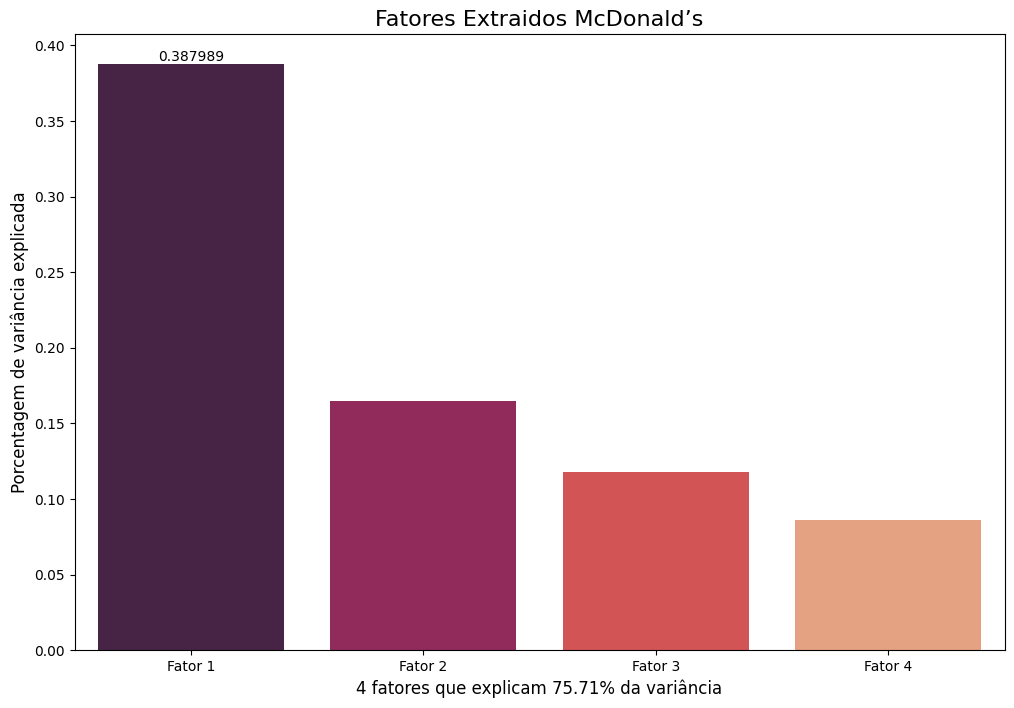

In [28]:
# Gráfico da variância acumulada dos componentes principais MC

plt.figure(figsize=(12,8))
ax = sns.barplot(x=tabela_eigen_mc.index, y=tabela_eigen_mc['Variância'], data=tabela_eigen_mc, palette='rocket')
ax.bar_label(ax.containers[0])
plt.title("Fatores Extraidos McDonald’s", fontsize=16)
plt.xlabel(f"{tabela_eigen_mc.shape[0]} fatores que explicam {round(tabela_eigen_mc['Variância'].sum()*100,2)}% da variância", fontsize=12)
plt.ylabel("Porcentagem de variância explicada", fontsize=12)
plt.show()

C:\Users\tok_b\AppData\Local\Temp\ipykernel_43720\70718368.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




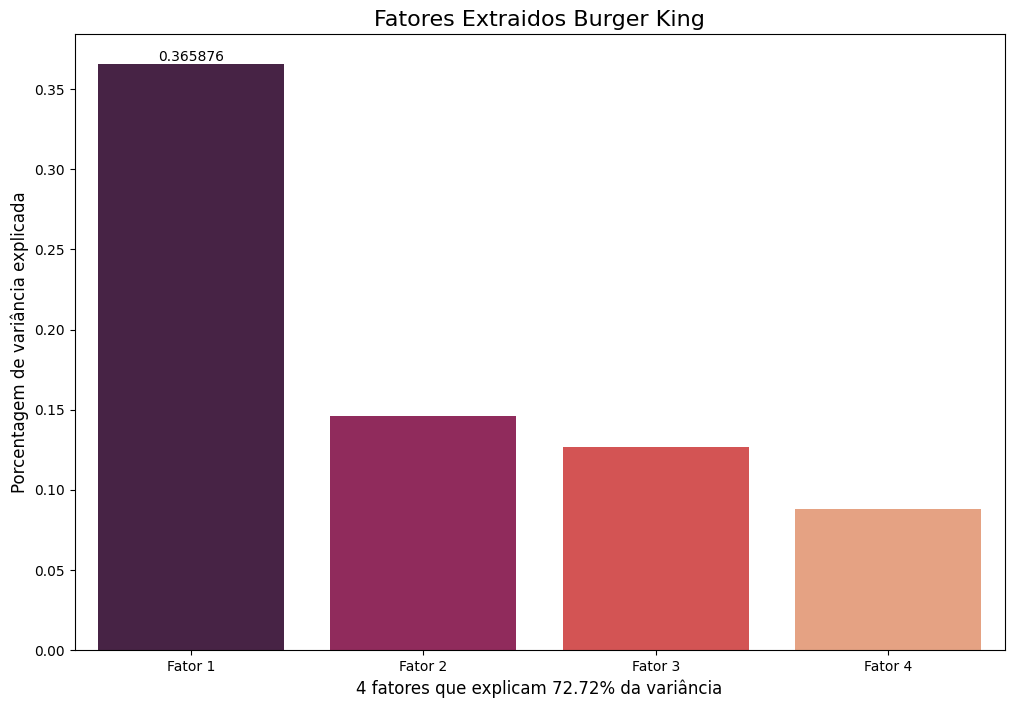

In [29]:
# Gráfico da variância acumulada dos componentes principais BK

plt.figure(figsize=(12,8))
ax = sns.barplot(x=tabela_eigen_bk.index, y=tabela_eigen_bk['Variância'], data=tabela_eigen_bk, palette='rocket')
ax.bar_label(ax.containers[0])
plt.title("Fatores Extraidos Burger King", fontsize=16)
plt.xlabel(f"{tabela_eigen_bk.shape[0]} fatores que explicam {round(tabela_eigen_bk['Variância'].sum()*100,2)}% da variância", fontsize=12)
plt.ylabel("Porcentagem de variância explicada", fontsize=12)
plt.show()

C:\Users\tok_b\AppData\Local\Temp\ipykernel_43720\1023421437.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




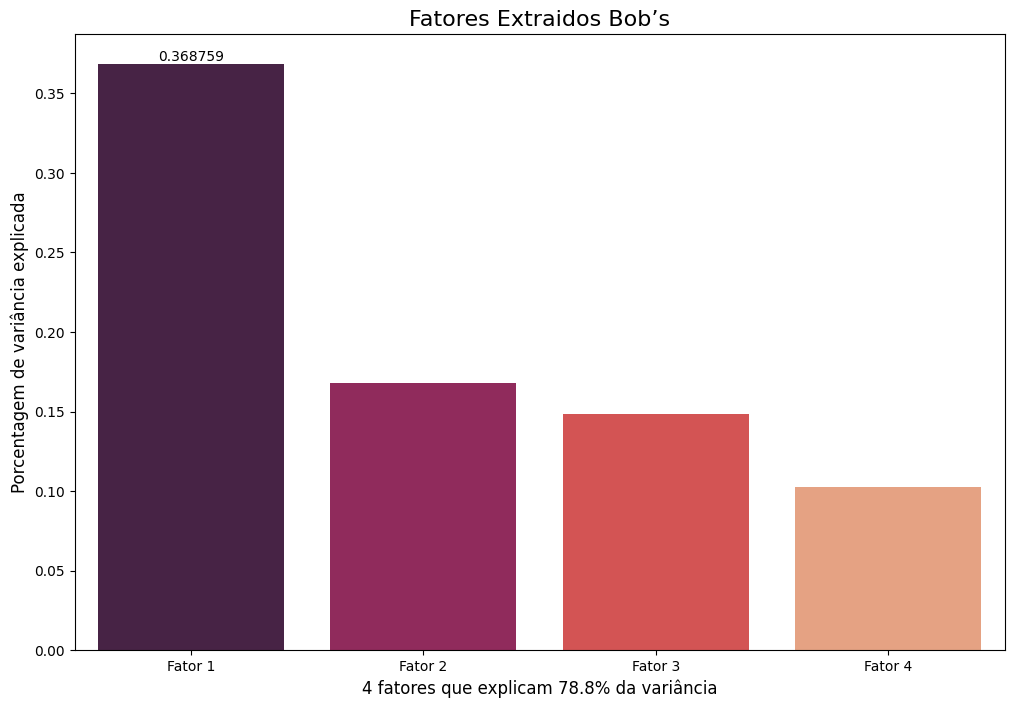

In [30]:
# Gráfico da variância acumulada dos componentes principais BO

plt.figure(figsize=(12,8))
ax = sns.barplot(x=tabela_eigen_bo.index, y=tabela_eigen_bo['Variância'], data=tabela_eigen_bo, palette='rocket')
ax.bar_label(ax.containers[0])
plt.title("Fatores Extraidos Bob’s", fontsize=16)
plt.xlabel(f"{tabela_eigen_bo.shape[0]} fatores que explicam {round(tabela_eigen_bo['Variância'].sum()*100,2)}% da variância", fontsize=12)
plt.ylabel("Porcentagem de variância explicada", fontsize=12)
plt.show()

###  Obtendo os autovetores

In [31]:
autovetores_mc = fat_mc.loadings_
autovetores_bk = fat_bk.loadings_
autovetores_bo = fat_bo.loadings_

print(f"\n Autovetores Mc\n{autovetores_mc}")
print(f"\n Autovetores Bk\n{autovetores_bk}")
print(f"\n Autovetores Bo\n{autovetores_bo}")



 Autovetores Mc
[[ 3.36113816e-01  5.69623593e-01  3.32803250e-01  1.12318439e-01
  -3.86117392e-01 -9.23970508e-02 -4.98546726e-01  1.25884475e-01
   1.12962854e-01 -6.54738713e-02 -2.20472646e-03 -9.06001551e-03
   5.39053828e-03]
 [ 2.61034106e-01  4.92101470e-01  9.90348248e-02  4.68641932e-01
  -4.71049606e-01  2.38746907e-01  4.11054532e-01 -1.07881526e-01
  -1.21483630e-03  2.58918510e-02 -9.34945083e-03 -3.27667928e-03
  -1.44915356e-03]
 [ 2.71216888e-01  8.16937644e-01  2.51467380e-01 -1.59369878e-01
   2.22954034e-01 -6.52059638e-02 -2.11491588e-02  2.23045367e-02
  -3.24959352e-01  9.81595396e-02 -1.17166245e-02  1.02843184e-02
  -6.13706895e-03]
 [ 2.36151520e-01  7.49666850e-01  7.69032068e-02 -3.10151691e-01
   3.97633554e-01  1.00746860e-01  1.65906913e-01 -6.87275512e-02
   2.75216595e-01 -4.08958155e-02  4.65736358e-02 -1.44981245e-03
   5.00985710e-03]
 [ 7.90131301e-01 -3.38488282e-01  4.16153625e-01 -8.65881551e-02
   5.76631403e-02  1.76348347e-01  2.18831180e-02

### Scores fatoriais

In [32]:
# Gerar scores fatoriais
scores_mc = fat_4_mc.transform(df_not_desc_mcdonalds)
scores_bk = fat_4_bk.transform(df_not_desc_burgerking)
scores_bo = fat_4_bo.transform(df_not_desc_bobs)

tabela_scores_mc = pd.DataFrame(scores_mc,
                                 columns=[f"Fator {i+1}" for i in range(scores_mc.shape[1])],
                                 index=df_not_desc_mcdonalds.index)

tabela_scores_bk= pd.DataFrame(scores_bk,
                                 columns=[f"Fator {i+1}" for i in range(scores_bk.shape[1])],
                                 index=df_not_desc_burgerking.index)

tabela_scores_bo= pd.DataFrame(scores_bo,
                                 columns=[f"Fator {i+1}" for i in range(scores_bo.shape[1])],
                                 index=df_not_desc_bobs.index)

print(f"mcdonalds\n{tabela_scores_mc}")
print(f"burgerking\n{tabela_scores_bk}")
print(f"bobs\n{tabela_scores_bo}")



mcdonalds
      Fator 1   Fator 2   Fator 3   Fator 4
0    0.954921  0.493934  0.174599  1.329332
1   -0.432298  0.893519  0.264239  0.623108
2    0.610800  0.355439 -0.236547 -0.327432
3   -0.491047  0.636758  0.173234  0.206875
4    2.084550 -0.487595  0.527008  0.899361
5   -1.141104 -2.657946  0.227797  2.735492
6   -0.705868  0.601656  0.869128  1.253394
7    0.698625  0.737275 -0.091553  0.265525
8    1.129444  2.051515 -0.417940  4.640091
9    1.685327 -0.112432  1.271101  0.791855
10  -0.011152  0.674128  0.034375  0.086857
11  -0.484735  0.656858  0.216544  0.141905
12  -0.334696  0.553482  0.317082  1.055254
13   0.004779  0.268559  0.051288 -0.356412
14  -0.310405  1.281769 -1.036008 -0.672153
15   0.511989  0.382595 -0.162970 -0.017270
16   0.598728  0.779388 -0.107922  0.856709
17  -0.469659  0.723761  0.235351  0.263590
18   2.088279 -0.478956  0.567096  0.813547
19   1.569203 -0.631723  1.143959 -0.203397
20  -1.108077  1.023029 -0.373746  1.418597
21   2.078786 -0.52503

d:\GIT\TCC\local-intelligence-maps\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

d:\GIT\TCC\local-intelligence-maps\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

d:\GIT\TCC\local-intelligence-maps\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



### Cargas fatoriais

In [33]:
cargas_fatoriais_mc = fat_4_mc.loadings_

tabela_cargas_mc = pd.DataFrame(cargas_fatoriais_mc)
tabela_cargas_mc.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_cargas_mc.columns)]
tabela_cargas_mc.index = df_not_desc_mcdonalds.columns

print(tabela_cargas_mc)


                Fator 1   Fator 2   Fator 3   Fator 4
rating         0.336114  0.569624  0.332803  0.112318
total_ratings  0.261034  0.492101  0.099035  0.468642
photos_count   0.271217  0.816938  0.251467 -0.159370
reviews_count  0.236152  0.749667  0.076903 -0.310152
renda          0.790131 -0.338488  0.416154 -0.086588
quota          0.862113 -0.265675  0.230271 -0.086805
escolaridade   0.934623 -0.148981 -0.088239  0.007570
idade          0.934708 -0.092183 -0.198717 -0.069077
mortalidade   -0.719957  0.226422 -0.223738 -0.142402
txcresc       -0.596585 -0.128986  0.586038  0.346676
causasext     -0.679307  0.026471 -0.124770 -0.389001
favel         -0.530156 -0.189296  0.678841  0.060608
denspop        0.043553  0.162329 -0.448238  0.672866


In [34]:
cargas_fatoriais_bk = fat_4_bk.loadings_

tabela_cargas_bk = pd.DataFrame(cargas_fatoriais_bk)
tabela_cargas_bk.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_cargas_bk.columns)]
tabela_cargas_bk.index = df_not_desc_burgerking.columns

print(tabela_cargas_bk)


                Fator 1   Fator 2   Fator 3   Fator 4
rating         0.274681  0.352277 -0.299541  0.340809
total_ratings  0.250066  0.408358 -0.122067  0.300358
photos_count   0.076821  0.810980 -0.097584 -0.010079
reviews_count  0.002846  0.707367 -0.149479  0.300416
renda          0.802822  0.045866  0.505414  0.108769
quota          0.864413 -0.034310  0.333480  0.114159
escolaridade   0.942596 -0.010155 -0.040436 -0.074815
idade          0.930832 -0.114282 -0.171046 -0.005453
mortalidade   -0.684201 -0.011439 -0.325238  0.239023
txcresc       -0.550280  0.484393  0.483268 -0.351166
causasext     -0.631008 -0.357353 -0.032916  0.511821
favel         -0.542587  0.208963  0.698740  0.028574
denspop       -0.048066  0.162188 -0.536656 -0.614917


In [35]:
cargas_fatoriais_bo = fat_4_bo.loadings_

tabela_cargas_bo = pd.DataFrame(cargas_fatoriais_bo)
tabela_cargas_bo.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_cargas_bo.columns)]
tabela_cargas_bo.index = df_not_desc_bobs.columns

print(tabela_cargas_bo)

                Fator 1   Fator 2   Fator 3   Fator 4
rating        -0.261818  0.035356  0.582739 -0.235823
total_ratings  0.137763  0.235060  0.606800  0.558175
photos_count  -0.074471  0.218812  0.739939 -0.234474
reviews_count -0.234092  0.499527  0.599982 -0.327827
renda          0.918865  0.012226  0.022785 -0.184600
quota          0.853435 -0.336980  0.183564 -0.056425
escolaridade   0.957352 -0.074113  0.089081 -0.017310
idade          0.909706 -0.265138  0.088649  0.017502
mortalidade   -0.778637 -0.339883 -0.007987  0.182824
txcresc        0.261253  0.817943 -0.286210  0.083681
causasext     -0.732124 -0.577561  0.192141  0.035973
favel         -0.342066  0.634096 -0.366304 -0.290572
denspop        0.041297  0.347082  0.119469  0.799572


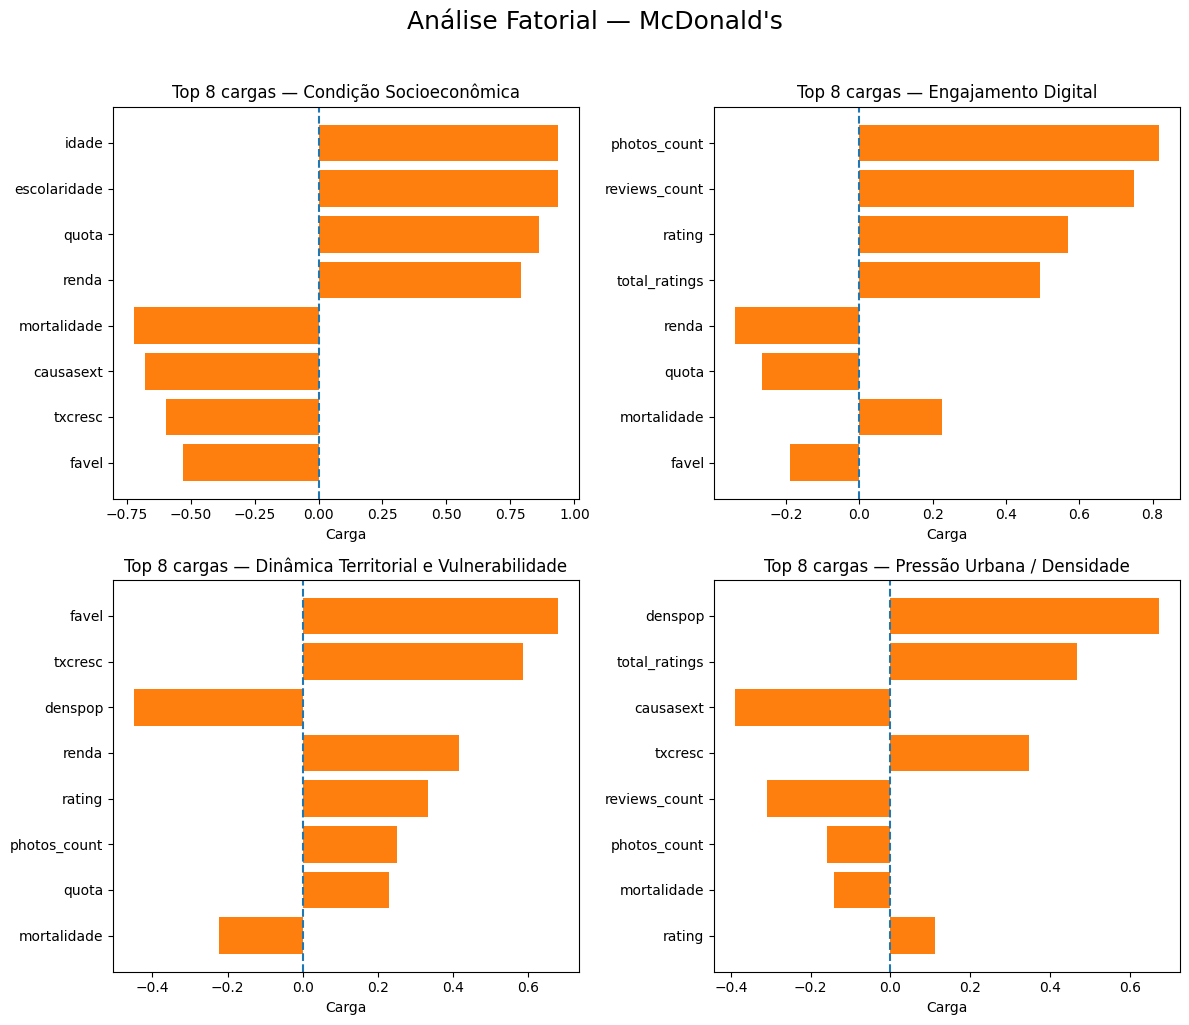

In [36]:
topN = 8
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

# nomes sintéticos para os fatores
nomes_fatores = {
    1: "Condição Socioeconômica",
    2: "Engajamento Digital",
    3: "Dinâmica Territorial e Vulnerabilidade",
    4: "Pressão Urbana / Densidade"
}

for i, ax in enumerate(axes, start=1):
    s = tabela_cargas_mc[f'Fator {i}'].abs().sort_values(ascending=False).head(topN)
    vals = tabela_cargas_mc.loc[s.index, f'Fator {i}']  # valores com sinal
    y = range(len(vals))
    
    ax.barh(y, vals.values)
    ax.barh(y, vals.values)
    ax.set_yticks(y)
    ax.set_yticklabels(s.index)
    ax.invert_yaxis()
    ax.axvline(0, ls='--')
    ax.set_xlabel('Carga')
    
    # aplica o nome sintético do fator
    ax.set_title(f"Top {topN} cargas — {nomes_fatores[i]}")
    fig.suptitle("Análise Fatorial — McDonald's", fontsize=18, y=1.02)

plt.tight_layout()
plt.show()

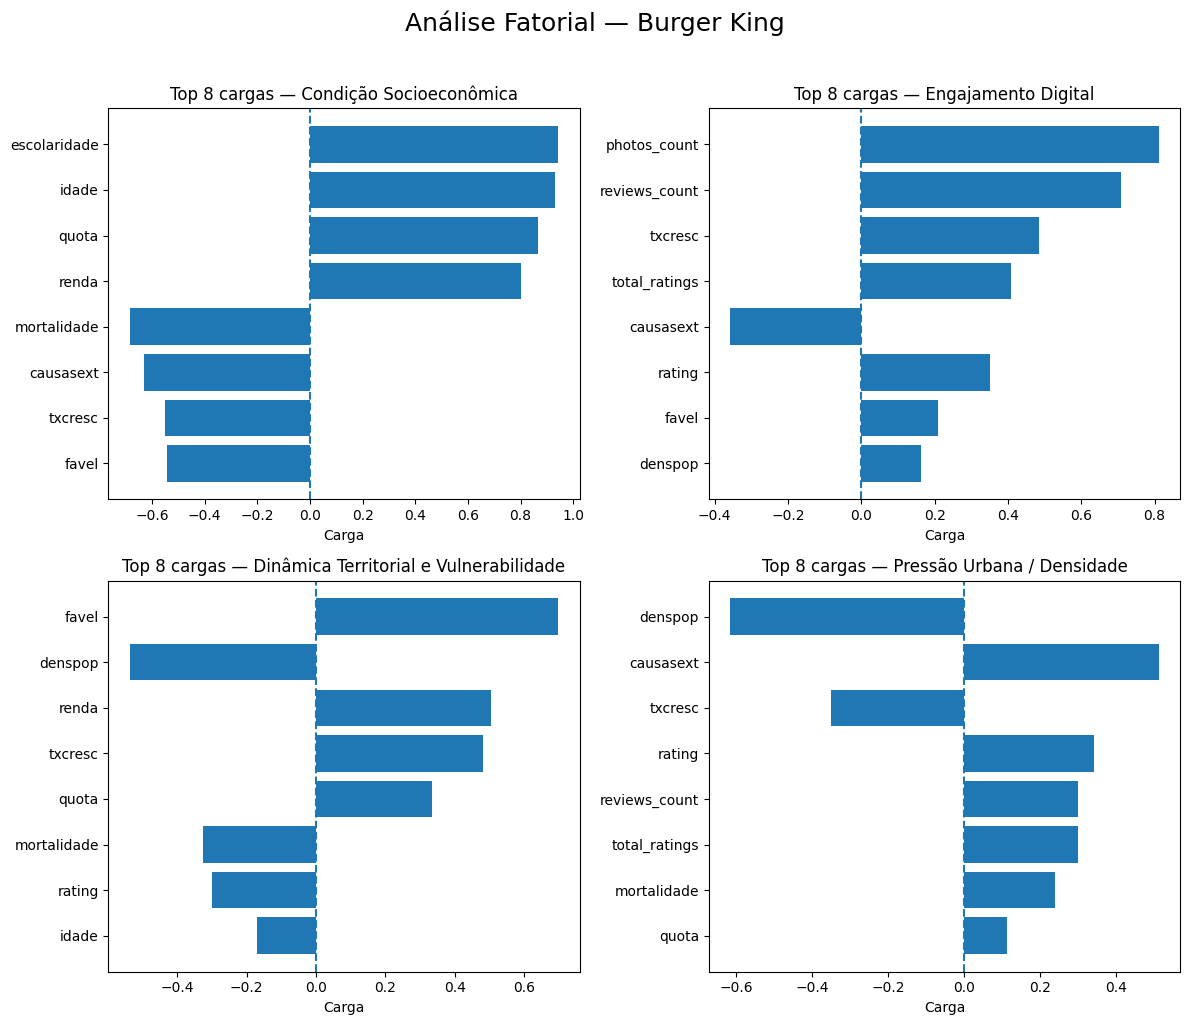

In [37]:
topN = 8
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

# nomes sintéticos para os fatores
nomes_fatores = {
    1: "Condição Socioeconômica",
    2: "Engajamento Digital",
    3: "Dinâmica Territorial e Vulnerabilidade",
    4: "Pressão Urbana / Densidade"
}

for i, ax in enumerate(axes, start=1):
    s = tabela_cargas_bk[f'Fator {i}'].abs().sort_values(ascending=False).head(topN)
    vals = tabela_cargas_bk.loc[s.index, f'Fator {i}']  # valores com sinal
    y = range(len(vals))
    
    ax.barh(y, vals.values)
    ax.set_yticks(y)
    ax.set_yticklabels(s.index)
    ax.invert_yaxis()
    ax.axvline(0, ls='--')
    ax.set_xlabel('Carga')
    
    # aplica o nome sintético do fator
    ax.set_title(f"Top {topN} cargas — {nomes_fatores[i]}")
    fig.suptitle("Análise Fatorial — Burger King", fontsize=18, y=1.02) 


plt.tight_layout()
plt.show()

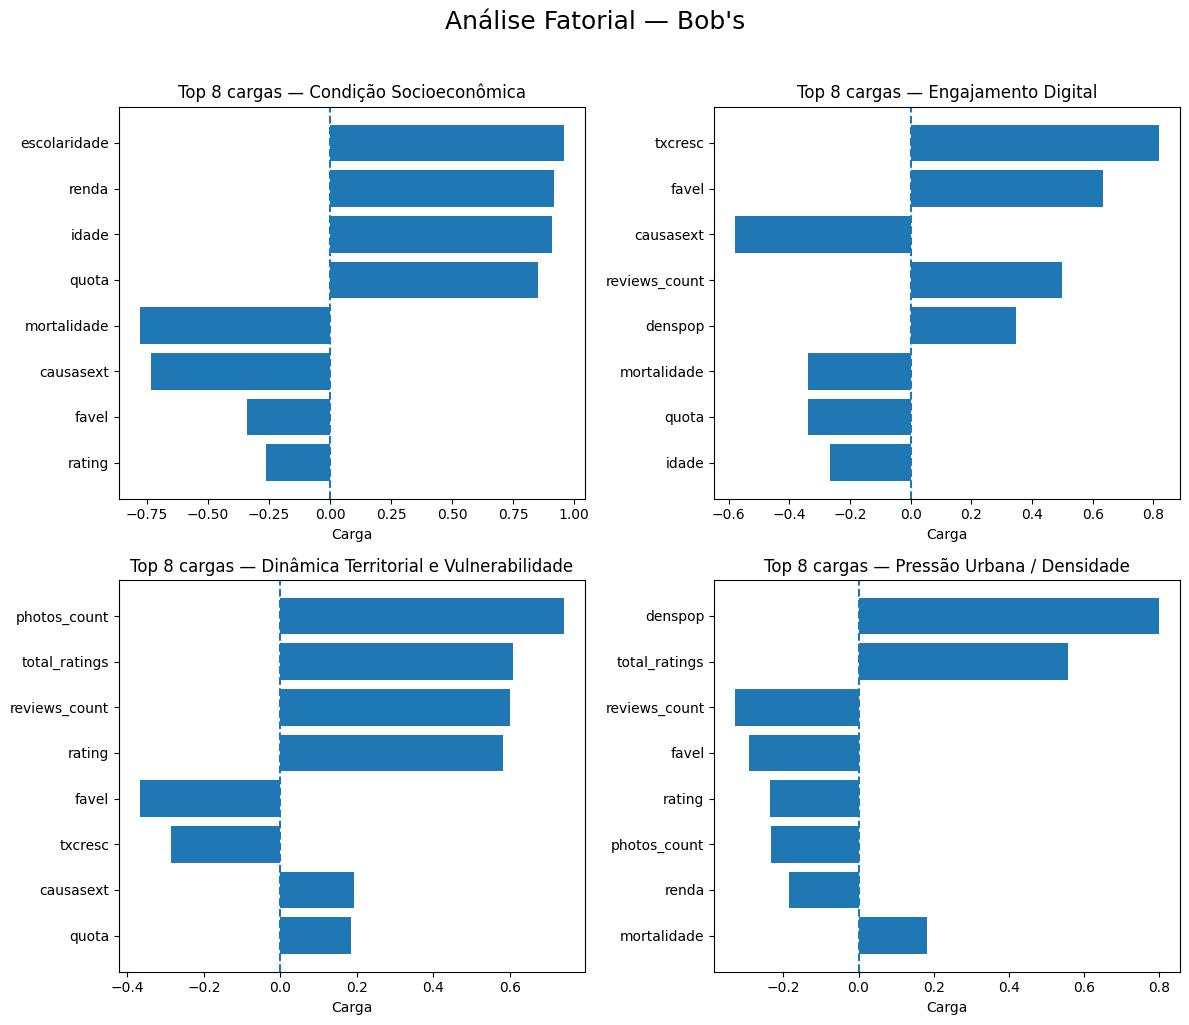

In [38]:
topN = 8
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

# nomes sintéticos para os fatores
nomes_fatores = {
    1: "Condição Socioeconômica",
    2: "Engajamento Digital",
    3: "Dinâmica Territorial e Vulnerabilidade",
    4: "Pressão Urbana / Densidade"
}

for i, ax in enumerate(axes, start=1):
    s = tabela_cargas_bo[f'Fator {i}'].abs().sort_values(ascending=False).head(topN)
    vals = tabela_cargas_bo.loc[s.index, f'Fator {i}']  # valores com sinal
    y = range(len(vals))
    
    ax.barh(y, vals.values)
    ax.set_yticks(y)
    ax.set_yticklabels(s.index)
    ax.invert_yaxis()
    ax.axvline(0, ls='--')
    ax.set_xlabel('Carga')
    
    # aplica o nome sintético do fator
    ax.set_title(f"Top {topN} cargas — {nomes_fatores[i]}")
    fig.suptitle("Análise Fatorial — Bob's", fontsize=18, y=1.02) 


plt.tight_layout()
plt.show()

### Rotação dos fatores para melhorar a interpratação, maximizando as cargas importantes

In [39]:
# Aplicando rotação varimax para melhorar a interpretação dos fatores
fat_mc_varimax = FactorAnalyzer(n_factors=4, method='principal', rotation='varimax').fit(df_not_desc_mcdonalds)

# Obtendo as cargas fatoriais após a rotação
autovalores_fatores_mc = fat_mc_varimax.get_factor_variance()

tabela_eigen_mc_varimax = pd.DataFrame(autovalores_fatores_mc)
tabela_eigen_mc_varimax.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_eigen_mc_varimax.columns)]
tabela_eigen_mc_varimax.index = ['Autovalor','Variância', 'Variância Acumulada']
tabela_eigen_mc_varimax = tabela_eigen_mc_varimax.T

print(f'Novos autovalores após a rotação - MC\n {tabela_eigen_mc_varimax}\n')

# Novas cargas fatoriais após a rotação
cargas_fatoriais_mc_varimax = fat_mc_varimax.loadings_

tabela_cargas_mc_varimax = pd.DataFrame(cargas_fatoriais_mc_varimax)
tabela_cargas_mc_varimax.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_cargas_mc_varimax.columns)]
tabela_cargas_mc_varimax.index = df_not_desc_mcdonalds.columns  # Usar as variáveis originais

print(f'Novas cargas fatoriais após a rotação - MC\n{tabela_cargas_mc_varimax}\n')

Novos autovalores após a rotação - MC
          Autovalor  Variância  Variância Acumulada
Fator 1   4.180455   0.321573             0.321573
Fator 2   2.224278   0.171098             0.492672
Fator 3   2.194811   0.168832             0.661503
Fator 4   1.242879   0.095606             0.757110

Novas cargas fatoriais após a rotação - MC
                Fator 1   Fator 2   Fator 3   Fator 4
rating         0.220346  0.693629  0.078112  0.158247
total_ratings  0.143573  0.480080  0.057344  0.534188
photos_count   0.015524  0.906153 -0.089077 -0.017067
reviews_count -0.071627  0.796014 -0.258158 -0.120259
renda          0.933810  0.042341  0.003280 -0.213912
quota          0.903601  0.060986 -0.190160 -0.134186
escolaridade   0.822733  0.061399 -0.464711  0.083329
idade          0.754056  0.083935 -0.589275  0.059545
mortalidade   -0.793763 -0.030554  0.057614 -0.075023
txcresc       -0.214442 -0.101813  0.881236  0.056974
causasext     -0.683622 -0.134875  0.062224 -0.373691
favel         

d:\GIT\TCC\local-intelligence-maps\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



In [40]:
# Aplicando rotação varimax para melhorar a interpretação dos fatores
fat_bk_varimax = FactorAnalyzer(n_factors=4, method='principal', rotation='varimax').fit(df_not_desc_burgerking)

# Obtendo as cargas fatoriais após a rotação
autovalores_fatores_bk = fat_bk_varimax.get_factor_variance()

tabela_eigen_bk_varimax = pd.DataFrame(autovalores_fatores_bk)
tabela_eigen_bk_varimax.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_eigen_bk_varimax.columns)]
tabela_eigen_bk_varimax.index = ['Autovalor','Variância', 'Variância Acumulada']
tabela_eigen_bk_varimax = tabela_eigen_bk_varimax.T

print(f'Novos autovalores após a rotação - BK\n {tabela_eigen_bk_varimax}\n')

# Novas cargas fatoriais após a rotação
cargas_fatoriais_bk_varimax = fat_bk_varimax.loadings_

tabela_cargas_bk_varimax = pd.DataFrame(cargas_fatoriais_bk_varimax)
tabela_cargas_bk_varimax.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_cargas_bk_varimax.columns)]
tabela_cargas_bk_varimax.index = df_not_desc_burgerking.columns  # Usar as variáveis originais

print(f'Novas cargas fatoriais após a rotação - BK\n{tabela_cargas_bk_varimax}\n')

Novos autovalores após a rotação - BK
          Autovalor  Variância  Variância Acumulada
Fator 1   3.966213   0.305093             0.305093
Fator 2   1.821445   0.140111             0.445204
Fator 3   2.337730   0.179825             0.625030
Fator 4   1.328032   0.102156             0.727186

Novas cargas fatoriais após a rotação - BK
                Fator 1   Fator 2   Fator 3   Fator 4
rating         0.057261  0.565585 -0.285025  0.031926
total_ratings  0.127019  0.548116 -0.111773  0.073117
photos_count   0.084065  0.724896  0.257963 -0.272264
reviews_count -0.078109  0.770001  0.117477 -0.012963
renda          0.899080  0.090950 -0.033443  0.310105
quota          0.869757  0.077503 -0.220353  0.248170
escolaridade   0.815596  0.122886 -0.452701 -0.102888
idade          0.725191  0.094133 -0.605887 -0.083263
mortalidade   -0.790006  0.061726  0.015818  0.054807
txcresc       -0.153002  0.053907  0.917512 -0.161758
causasext     -0.699219 -0.180913 -0.038521  0.515554
favel         

d:\GIT\TCC\local-intelligence-maps\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



In [41]:
# Aplicando rotação varimax para melhorar a interpretação dos fatores
fat_bo_varimax = FactorAnalyzer(n_factors=4, method='principal', rotation='varimax').fit(df_not_desc_bobs)

# Obtendo as cargas fatoriais após a rotação
autovalores_fatores_bo = fat_bo_varimax.get_factor_variance()

tabela_eigen_bo_varimax = pd.DataFrame(autovalores_fatores_bo)
tabela_eigen_bo_varimax.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_eigen_bo_varimax.columns)]
tabela_eigen_bo_varimax.index = ['Autovalor','Variância', 'Variância Acumulada']
tabela_eigen_bo_varimax = tabela_eigen_bo_varimax.T

print(f'Novos autovalores após a rotação - BO\n {tabela_eigen_bo_varimax}\n')

# Novas cargas fatoriais após a rotação
cargas_fatoriais_bo_varimax = fat_bo_varimax.loadings_

tabela_cargas_bo_varimax = pd.DataFrame(cargas_fatoriais_bo_varimax)
tabela_cargas_bo_varimax.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_cargas_bo_varimax.columns)]
tabela_cargas_bo_varimax.index = df_not_desc_bobs.columns  # Usar as variáveis originais

print(f'Novas cargas fatoriais após a rotação - BO\n{tabela_cargas_bo_varimax}\n')

Novos autovalores após a rotação - BO
          Autovalor  Variância  Variância Acumulada
Fator 1   4.621769   0.355521             0.355521
Fator 2   2.198149   0.169088             0.524609
Fator 3   1.927401   0.148262             0.672871
Fator 4   1.496220   0.115094             0.787965

Novas cargas fatoriais após a rotação - BO
                Fator 1   Fator 2   Fator 3   Fator 4
rating        -0.132557 -0.189190  0.641300 -0.019118
total_ratings  0.134393 -0.066977  0.334337  0.787190
photos_count   0.052563 -0.051190  0.799904  0.103357
reviews_count -0.147956  0.242461  0.830733  0.031291
renda          0.917363  0.174044 -0.047020 -0.070712
quota          0.906877 -0.229760 -0.059746  0.001221
escolaridade   0.955054  0.053820 -0.091881  0.082356
idade          0.927709 -0.131548 -0.157219  0.057975
mortalidade   -0.738526 -0.453905 -0.061914 -0.000517
txcresc        0.095736  0.875153 -0.068013  0.215680
causasext     -0.612758 -0.714287  0.087458 -0.120277
favel         

d:\GIT\TCC\local-intelligence-maps\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



Determinando as comunalidades, após rotação

In [42]:
comunalidades_mc = fat_mc_varimax.get_communalities()

tabela_comunalidades_mc = pd.DataFrame(comunalidades_mc)
tabela_comunalidades_mc.columns = ['Comunalidades']
tabela_comunalidades_mc.index = df_not_desc_mcdonalds.columns

print(tabela_comunalidades_mc)

               Comunalidades
rating              0.560817
total_ratings       0.539736
photos_count        0.829580
reviews_count       0.719876
renda               0.919563
quota               0.874381
escolaridade        0.903559
idade               0.926436
mortalidade         0.639941
txcresc             0.836175
causasext           0.629048
favel               0.781397
denspop             0.681914


In [43]:
comunalidades_bk = fat_4_bk.get_communalities()

tabela_comunalidades_bk = pd.DataFrame(comunalidades_bk)
tabela_comunalidades_bk.columns = ['Comunalidades']
tabela_comunalidades_bk.index = df_not_desc_burgerking.columns

print(tabela_comunalidades_bk)

               Comunalidades
rating              0.405424
total_ratings       0.334405
photos_count        0.673214
reviews_count       0.612971
renda               0.913900
quota               0.872628
escolaridade        0.895823
idade               0.908796
mortalidade         0.631174
txcresc             0.894311
causasext           0.788916
favel               0.827120
denspop             0.694739


In [44]:
comunalidades_bo = fat_4_bo.get_communalities()

tabela_comunalidades_bo = pd.DataFrame(comunalidades_bo)
tabela_comunalidades_bo.columns = ['Comunalidades']
tabela_comunalidades_bo.index = df_not_desc_bobs.columns

print(tabela_comunalidades_bo)

               Comunalidades
rating              0.464995
total_ratings       0.753998
photos_count        0.655912
reviews_count       0.771775
renda               0.879058
quota               0.878787
escolaridade        0.930250
idade               0.906028
mortalidade         0.755284
txcresc             0.826202
causasext           0.907794
favel               0.737698
denspop             0.775759


Extração dos fatores para as observações do banco de dados. Lembrando que a função transform aplica o Z-score internamente na função do Factoranalyze

In [45]:
fatores_mc = pd.DataFrame(fat_mc_varimax.transform(df_not_desc_mcdonalds))
fatores_mc.columns =  [f"Fator {i+1}" for i, v in enumerate(fatores_mc.columns)]

d:\GIT\TCC\local-intelligence-maps\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



In [46]:
fatores_bk = pd.DataFrame(fat_bk_varimax.transform(df_not_desc_mcdonalds))
fatores_bk.columns =  [f"Fator {i+1}" for i, v in enumerate(fatores_bk.columns)]

d:\GIT\TCC\local-intelligence-maps\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



In [47]:
fatores_bo = pd.DataFrame(fat_bo_varimax.transform(df_not_desc_bobs))
fatores_bo.columns =  [f"Fator {i+1}" for i, v in enumerate(fatores_bo.columns)]

d:\GIT\TCC\local-intelligence-maps\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



Adicionando os fatores ao banco de dados

In [48]:
df_merged_mc = pd.concat([df_not_desc_mcdonalds.reset_index(drop=True), fatores_mc], axis=1)
print(df_merged_mc.head())    

   rating  total_ratings  photos_count  reviews_count  renda   quota  \
0     4.0        11716.0            10              5   2782   49.27   
1     4.0         9038.0            10              5   1418   18.43   
2     3.8         7581.0            10              5   2466   50.06   
3     3.9         4862.0            10              5   1418   18.43   
4     3.8         6585.0            10              5   4318  104.73   

   escolaridade  idade  mortalidade  txcresc  causasext  favel  denspop  \
0           8.3     33        10.94    -1.43      46.46   1.12   132.35   
1           6.6     26        13.87    -1.59      63.17   7.60    95.94   
2           8.2     34        16.16    -2.38      71.37   0.00    82.91   
3           6.6     26        13.87    -1.59      63.17   7.60    95.94   
4           8.7     36         6.46    -2.85      22.75   0.00   146.33   

    Fator 1   Fator 2   Fator 3   Fator 4  
0  0.870035  0.567322  0.109326  1.364804  
1 -0.513763  0.709920  0.497

In [49]:
df_merged_bk = pd.concat([df_not_desc_burgerking.reset_index(drop=True), fatores_bk], axis=1)

In [50]:
df_merged_bo = pd.concat([df_not_desc_bobs.reset_index(drop=True), fatores_bo], axis=1)

### Identificando os scores

In [51]:
# Verificar se ambos foram ajustados corretamente
print("MC fitted:", hasattr(fat_mc_varimax, 'loadings_'))
print("BK fitted:", hasattr(fat_bk_varimax, 'loadings_'))

# Verificar se weights_ existe
print("MC weights:", fat_mc_varimax.weights_ is not None)
print("BK weights:", fat_bk_varimax.weights_ is not None)

# Verificar se há problemas nos dados
print("Shape MC:", df_not_desc_mcdonalds.shape)
print("Shape BK:", df_not_desc_burgerking.shape)

# Verificar valores missing
print("Missing MC:", df_not_desc_mcdonalds.isnull().sum().sum())
print("Missing BK:", df_not_desc_burgerking.isnull().sum().sum())

# Verificar se as matrizes são válidas
print("Determinante MC:", np.linalg.det(df_not_desc_mcdonalds.corr()))
print("Determinante BK:", np.linalg.det(df_not_desc_burgerking.corr()))

MC fitted: True
BK fitted: True
MC weights: True
BK weights: True
Shape MC: (172, 13)
Shape BK: (112, 13)
Missing MC: 0
Missing BK: 0
Determinante MC: 2.630656133990348e-05
Determinante BK: 5.292066099719536e-05


In [52]:
scores_mc = fat_mc_varimax.weights_

tabela_scores_mc = pd.DataFrame(scores_mc)
tabela_scores_mc.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_scores_mc.columns)]
tabela_scores_mc.index = df_not_desc_mcdonalds.columns

print(tabela_scores_mc)

                Fator 1   Fator 2   Fator 3   Fator 4
rating         0.053339  0.317109  0.143381  0.090801
total_ratings  0.037897  0.188266  0.142389  0.420630
photos_count  -0.046840  0.429891  0.005077 -0.091026
reviews_count -0.098825  0.377693 -0.126624 -0.187329
renda          0.277022 -0.000400  0.145872 -0.176150
quota          0.234079 -0.008260  0.036244 -0.130132
escolaridade   0.163537 -0.038220 -0.117085  0.024714
idade          0.120180 -0.030662 -0.203177 -0.010043
mortalidade   -0.227021  0.025924 -0.114078 -0.060833
txcresc        0.093908  0.010195  0.479301  0.142810
causasext     -0.191273 -0.005852 -0.128743 -0.303210
favel          0.105392  0.041222  0.437516 -0.115652
denspop       -0.049877 -0.106574 -0.042415  0.659740


In [53]:
scores_bk = fat_bk_varimax.weights_

tabela_scores_bk = pd.DataFrame(scores_bk)
tabela_scores_bk.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_scores_bk.columns)]
tabela_scores_bk.index = df_not_desc_burgerking.columns

print(tabela_scores_bk)

                Fator 1   Fator 2   Fator 3   Fator 4
rating        -0.081251  0.339803 -0.160994  0.103832
total_ratings -0.028526  0.322449 -0.059364  0.120868
photos_count   0.020548  0.378435  0.142963 -0.149558
reviews_count -0.069642  0.452660  0.023185  0.072482
renda          0.262591  0.012608  0.118485  0.220543
quota          0.223831  0.006504  0.019059  0.183147
escolaridade   0.174955  0.005938 -0.093086 -0.069537
idade          0.120812  0.004143 -0.189916 -0.044771
mortalidade   -0.257493  0.109304 -0.135877  0.078400
txcresc        0.113698 -0.004282  0.464583 -0.170127
causasext     -0.234534  0.013071 -0.168413  0.410478
favel          0.090202 -0.018997  0.392456  0.205966
denspop       -0.029352 -0.076857 -0.025954 -0.626335


In [54]:
scores_bo = fat_bk_varimax.weights_

tabela_scores_bo = pd.DataFrame(scores_bo)
tabela_scores_bo.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_scores_bo.columns)]
tabela_scores_bo.index = df_not_desc_bobs.columns

print(tabela_scores_bo)

                Fator 1   Fator 2   Fator 3   Fator 4
rating        -0.081251  0.339803 -0.160994  0.103832
total_ratings -0.028526  0.322449 -0.059364  0.120868
photos_count   0.020548  0.378435  0.142963 -0.149558
reviews_count -0.069642  0.452660  0.023185  0.072482
renda          0.262591  0.012608  0.118485  0.220543
quota          0.223831  0.006504  0.019059  0.183147
escolaridade   0.174955  0.005938 -0.093086 -0.069537
idade          0.120812  0.004143 -0.189916 -0.044771
mortalidade   -0.257493  0.109304 -0.135877  0.078400
txcresc        0.113698 -0.004282  0.464583 -0.170127
causasext     -0.234534  0.013071 -0.168413  0.410478
favel          0.090202 -0.018997  0.392456  0.205966
denspop       -0.029352 -0.076857 -0.025954 -0.626335


In [69]:
variaveis_portugues = {
    'rating': 'avaliacao',
    'total_ratings': 'total_classificacao',
    'photos_count': 'quantidade_foto',
    'reviews_count': 'quantidade_comentarios',
    'renda': 'renda',
    'quota': 'quota', 
    'escolaridade': 'escolaridade',
    'idade': 'idade',
    'mortalidade': 'mortalidade',
    'txcresc': 'txcresc',
    'causasext': 'causasext',
    'favel': 'favel',
    'denspop': 'denspop'
}

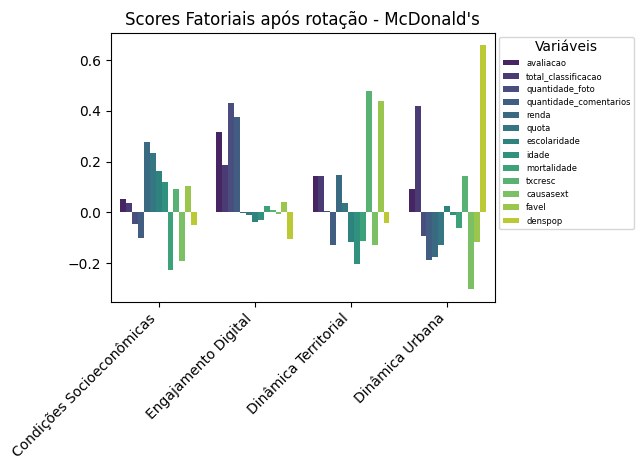

In [74]:
# Criar um dicionário com as descrições dos fatores
fatores_descricao = {
    'Fator 1': 'Condições Socioeconômicas',
    'Fator 2': 'Engajamento Digital', 
    'Fator 3': 'Dinâmica Territorial',
    'Fator 4': 'Dinâmica Urbana'
}


# Renomear as colunas da tabela original
tabela_scores_mc_desc = tabela_scores_mc.copy()
tabela_scores_mc_desc.columns = [fatores_descricao[col] for col in tabela_scores_mc_desc.columns]

# Renomear o índice (variáveis) para português
tabela_scores_mc_desc.index = [variaveis_portugues[var] for var in tabela_scores_mc_desc.index]

# Preparar dados para o gráfico
tabela_scores_graph_mc = tabela_scores_mc_desc.reset_index()
tabela_scores_graph_mc = tabela_scores_graph_mc.melt(id_vars='index')

# Criar o gráfico
sns.barplot(data=tabela_scores_graph_mc, x='variable', y='value', hue='index', palette='viridis')
plt.legend(title='Variáveis', bbox_to_anchor=(1,1), fontsize='6')
plt.title('Scores Fatoriais após rotação - McDonald\'s', fontsize='12')
plt.xlabel(xlabel=None)
plt.ylabel(ylabel=None)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

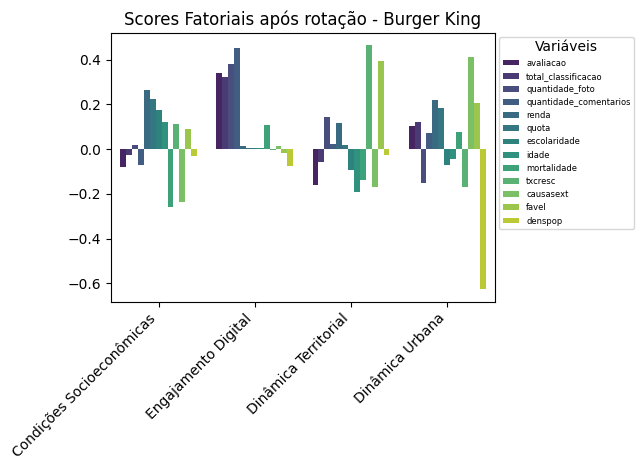

In [72]:
# Criar um dicionário com as descrições dos fatores
fatores_descricao = {
    'Fator 1': 'Condições Socioeconômicas',
    'Fator 2': 'Engajamento Digital', 
    'Fator 3': 'Dinâmica Territorial',
    'Fator 4': 'Dinâmica Urbana'
}

# Renomear as colunas da tabela original
tabela_scores_bk_desc = tabela_scores_bk.copy()
tabela_scores_bk_desc.columns = [fatores_descricao[col] for col in tabela_scores_bk_desc.columns]

#Renomear as colunas da tabela original
tabela_scores_bk_desc = tabela_scores_bk.copy()
tabela_scores_bk_desc.columns = [fatores_descricao[col] for col in tabela_scores_bk_desc.columns]

# Renomear o índice (variáveis) para português
tabela_scores_bk_desc.index = [variaveis_portugues[var] for var in tabela_scores_bk_desc.index]

# Preparar dados para o gráfico
tabela_scores_graph_bk = tabela_scores_bk_desc.reset_index()
tabela_scores_graph_bk = tabela_scores_graph_bk.melt(id_vars='index')

# Criar o gráfico
sns.barplot(data=tabela_scores_graph_bk, x='variable', y='value', hue='index', palette='viridis')
plt.legend(title='Variáveis', bbox_to_anchor=(1,1), fontsize='6')
plt.title('Scores Fatoriais após rotação - Burger King', fontsize='12')
plt.xlabel(xlabel=None)
plt.ylabel(ylabel=None)
plt.xticks(rotation=45, ha='right')  # Rotacionar rótulos se ficarem sobrepostos
plt.tight_layout()
plt.show()

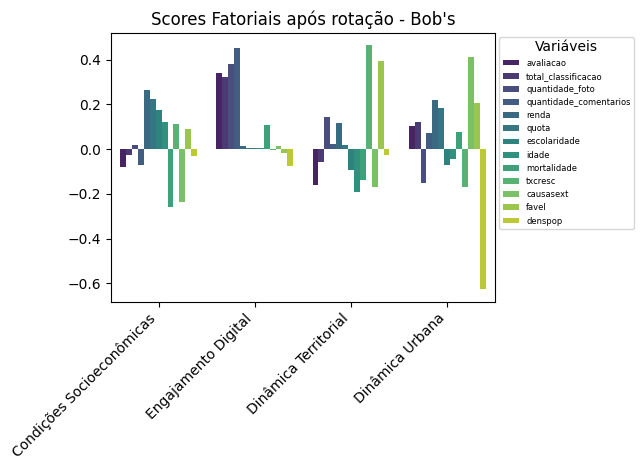

In [73]:
#%% Interpretando os scores fatoriais em cada fator extraído

# Criar um dicionário com as descrições dos fatores
fatores_descricao = {
    'Fator 1': 'Condições Socioeconômicas',
    'Fator 2': 'Engajamento Digital', 
    'Fator 3': 'Dinâmica Territorial',
    'Fator 4': 'Dinâmica Urbana'
}

# Renomear as colunas da tabela original
tabela_scores_bo_desc = tabela_scores_bo.copy()
tabela_scores_bo_desc.columns = [fatores_descricao[col] for col in tabela_scores_bo_desc.columns]

# Renomear as colunas da tabela original
tabela_scores_bo_desc = tabela_scores_bo.copy()
tabela_scores_bo_desc.columns = [fatores_descricao[col] for col in tabela_scores_bo_desc.columns]

# Renomear o índice (variáveis) para português
tabela_scores_bo_desc.index = [variaveis_portugues[var] for var in tabela_scores_bo_desc.index]


# Preparar dados para o gráfico
tabela_scores_graph_bo = tabela_scores_bo_desc.reset_index()
tabela_scores_graph_bo = tabela_scores_graph_bo.melt(id_vars='index')

# Criar o gráfico
sns.barplot(data=tabela_scores_graph_bo, x='variable', y='value', hue='index', palette='viridis')
plt.legend(title='Variáveis', bbox_to_anchor=(1,1), fontsize='6')
plt.title("Scores Fatoriais após rotação - Bob's", fontsize='12')
plt.xlabel(xlabel=None)
plt.ylabel(ylabel=None)
plt.xticks(rotation=45, ha='right')  # Rotacionar rótulos se ficarem sobrepostos
plt.tight_layout()
plt.show()